In [297]:
from sklearn.cluster import KMeans
import sys
sys.path.insert(0, '/Users/aaron/Documents/Galvanize/capstone/discover-art/src/')
import os
from Art_class import Art
from scipy import misc
from PIL import Image

In [298]:
model = KMeans(n_clusters=5)

# Let's try to cluster based on aspect ratio symmetry, and blurriness

In [299]:
filepath = '../collections/drizl/resize/test_small/'
artwork = []
added = 1
for image in os.listdir(filepath):
    art = Art()
    art.load_image(filepath + image)
    artwork.append(art)
print '{} Images added to collection'.format(len(os.listdir(filepath)))

345 Images added to collection


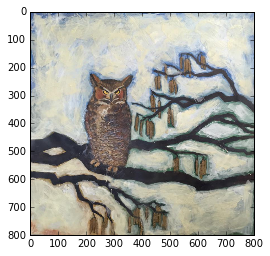

In [5]:
%matplotlib inline
plt.imshow(im)

In [6]:
def sort_by_blur(artwork):
    blur = []
    for art in artwork:
        blur.append(art.bluriness)
    blur_array = np.array(blur)
    return np.argsort(blur_array)

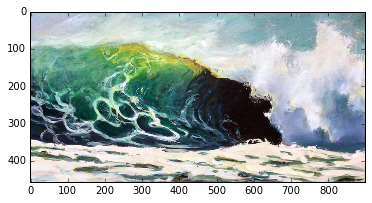

In [9]:
artwork[0].show_image()

## Sort by bluriness and show image

10060.6094945


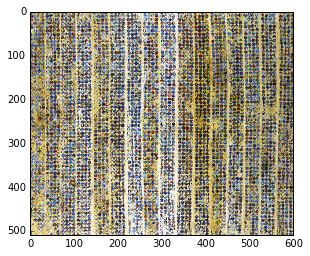

12.6546245823


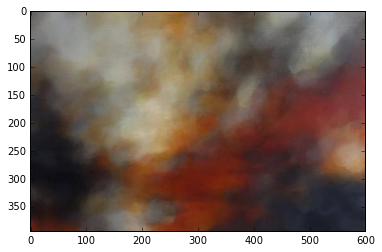

In [172]:
artwork.sort(key=lambda x: x.bluriness, reverse=True)
print artwork[0].bluriness
artwork[0].show_image()
print artwork[-1].bluriness
artwork[-1].show_image()

## Sort by aspect ratio and show images

4.4776119403


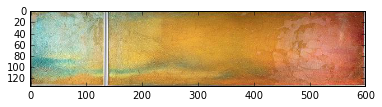

0.288333333333


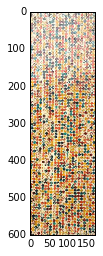

In [26]:
artwork.sort(key=lambda x: x.aspect_ratio, reverse=True)
print artwork[0].aspect_ratio
artwork[0].show_image()
print artwork[-1].aspect_ratio
artwork[-1].show_image()

0.0972929141441


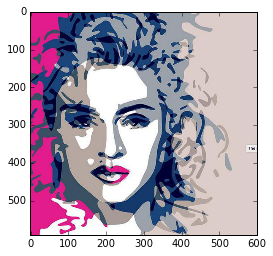

0.0643459925222


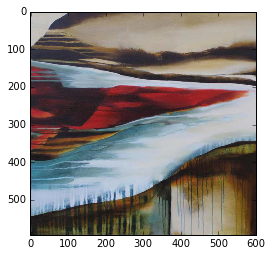

0.0585882957367


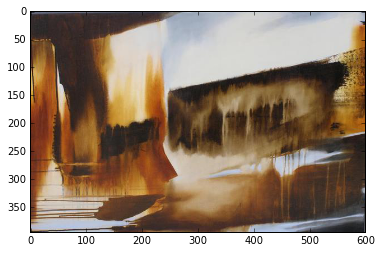

0.0559032556812


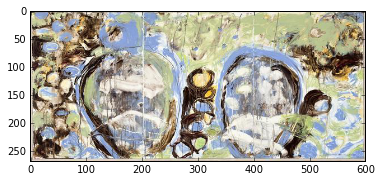

0.0523110805406


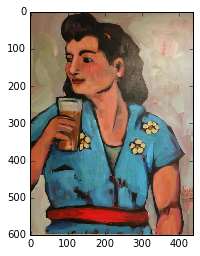

0.0486691112759


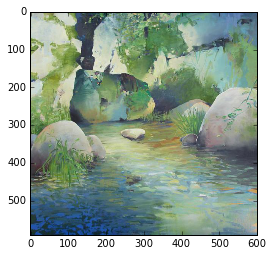

0.0448945477265


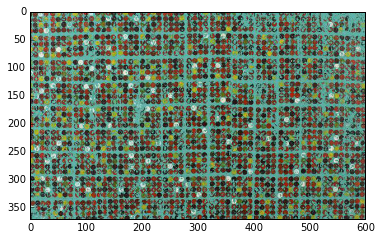

0.0407341474394


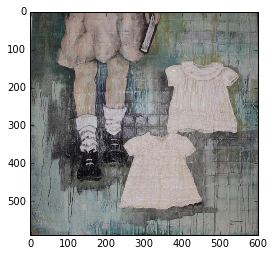

0.0374203385054


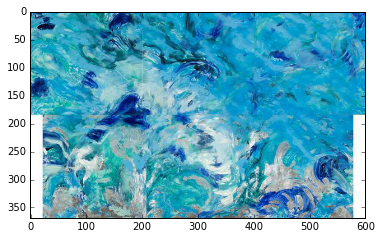

0.0354131418577


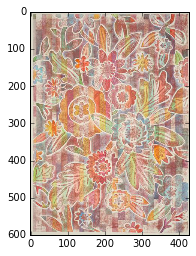

0.0324463117494


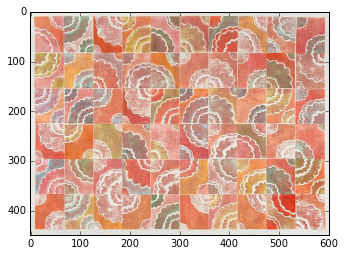

0.0298357906694


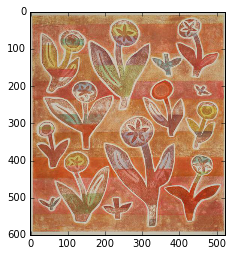

0.0265733243952


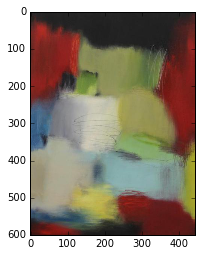

0.0234110095973


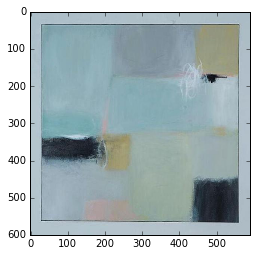

0.0205260266879


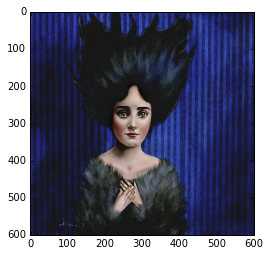

0.0160090765497


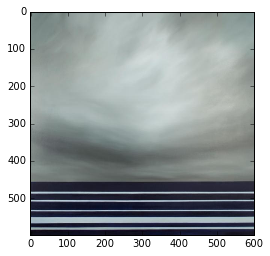

0.00988723411928


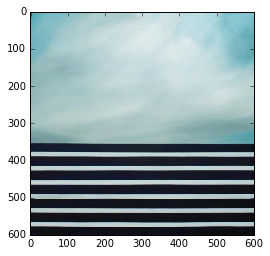

0.00627672714612


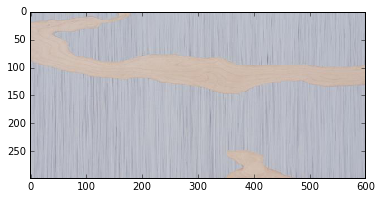

In [88]:
artwork.sort(key=lambda x: x.symmetry, reverse=True)
for i in xrange(0, len(artwork), 20):
    print artwork[i].symmetry
    artwork[i].show_image()

## Calculate features to be used in clustering

In [350]:
# create simple feature set of symmetry, blurriness, aspect_ratio
X = np.zeros((1,3))
for art in artwork:
    row = np.array([art.symmetry, art.bluriness, art.aspect_ratio]).reshape((1,3))
    X = np.concatenate((X, row), axis=0)
fit = model.fit(X)
predict = model.fit_predict(X)

In [351]:
d = {0:'r', 1:'b', 2:'g', 3:'c', 4:'m'}
colors = []
for i in predict:
    colors.append(d[i]) 

In [352]:
fit.cluster_centers_

array([[  3.92622169e-02,   1.30961446e+03,   1.19067205e+00],
       [  5.91074471e-02,   8.84133967e+03,   9.36048535e-01],
       [  3.38679122e-02,   3.42794817e+02,   1.17909175e+00],
       [  4.61705238e-02,   4.78593187e+03,   1.16429930e+00],
       [  4.27758964e-02,   2.68257383e+03,   1.24774253e+00]])

In [353]:
def plot_kmeans(my_data, my_fit, x, y):
    plt.figure(figsize=(10, 6))
    plt.xlim(my_data[:,x].min() - 0.1 * my_data[:,x].max(), my_data[:,x].max() + 0.1 * my_data[:,x].max())
    plt.ylim(my_data[:,y].min() - 0.1 * my_data[:,y].max(), my_data[:,y].max() + 0.1 * my_data[:,y].max())
    plt.scatter(my_data[:,x], my_data[:,y], c=colors, edgecolors='face')
    plt.scatter(fit.cluster_centers_[:,x], fit.cluster_centers_[:,y], c=['r', 'b', 'g', 'c', 'm'], s=50)

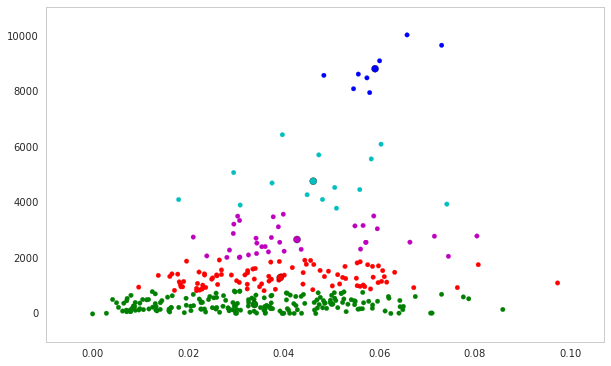

In [354]:
plot_kmeans(X, fit, 0, 1)

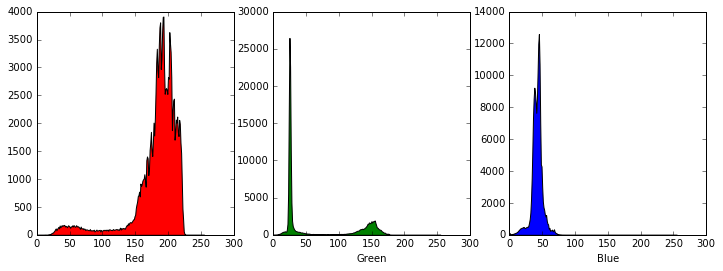

In [257]:
artwork[3].plot_rgb()

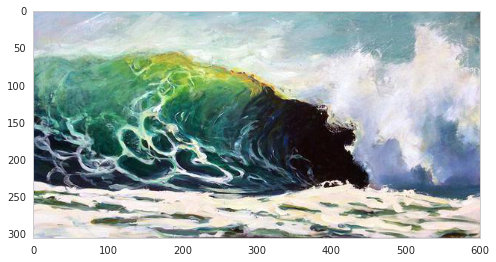

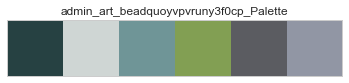

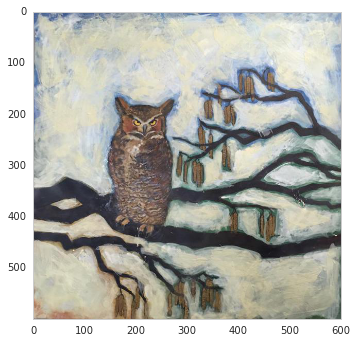

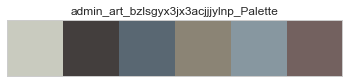

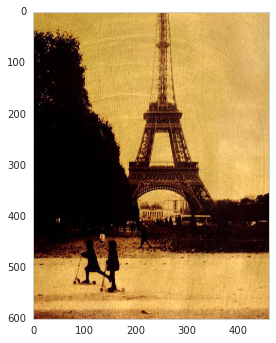

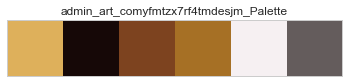

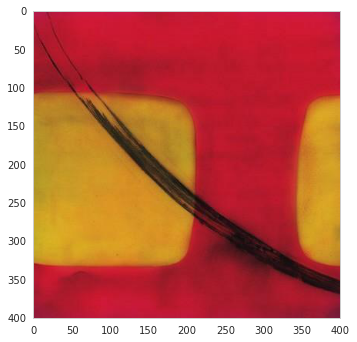

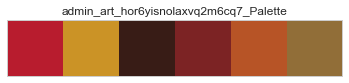

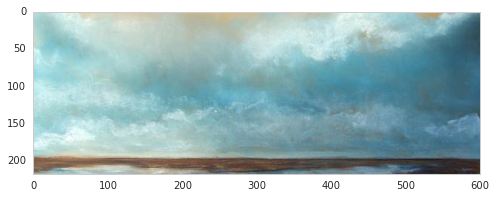

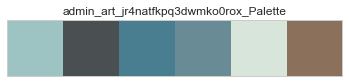

In [310]:
for art in artwork[0:5]:
    art.show_image()
    art.get_palette(plot=True)

In [278]:
fit.cluster_centers_

array([[  3.38679122e-02,   3.42794817e+02,   1.17909175e+00],
       [  5.91074471e-02,   8.84133967e+03,   9.36048535e-01],
       [  4.27758964e-02,   2.68257383e+03,   1.24774253e+00],
       [  4.61705238e-02,   4.78593187e+03,   1.16429930e+00],
       [  3.92622169e-02,   1.30961446e+03,   1.19067205e+00]])

## Return closest datapoint to centroids

In [347]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(fit.cluster_centers_, X, 'euclidean')

In [348]:
closest

array([334, 263, 318, 151, 178])

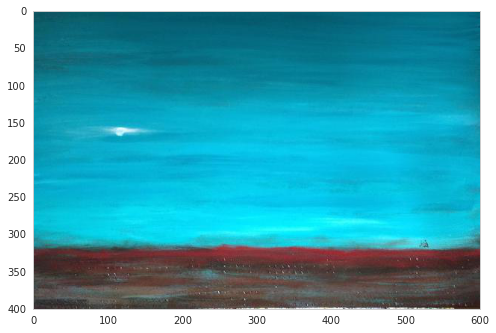

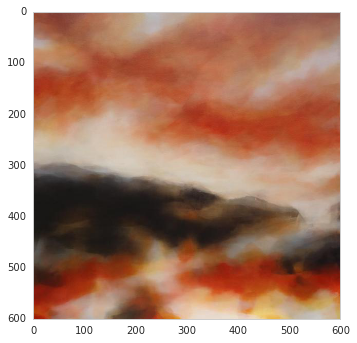

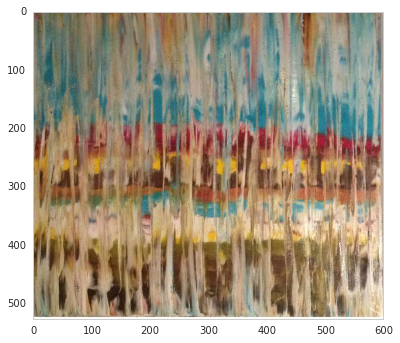

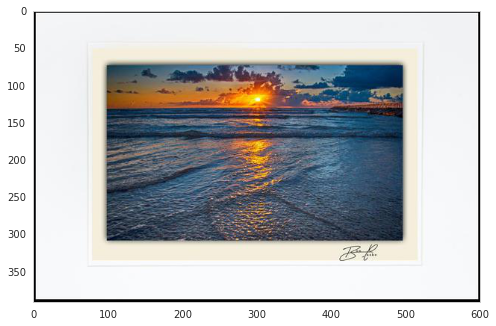

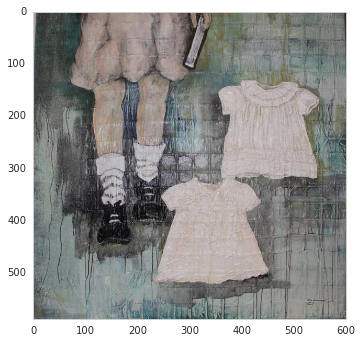

In [349]:
for c in closest:
    artwork[c].show_image()